## Importing the necessary libraries

In [1]:
# To enable plotting graphs in jupyter notebook
%matplotlib inline

#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for statistical plots:
import seaborn as sns



## 2.Read data as data frame

In [2]:
my_data=pd.read_csv("bank-full.csv")

Attribute Information:

age (numeric)

job : type of job (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: has credit in default? (categorical: 'no','yes','unknown')

balance: average yearly balance, in euros (numeric)

housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')

contact: contact communication type (categorical:'cellular','telephone')

day: last contact day of the month (numeric 1 -31)

month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')

duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., ifduration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic
predictive model.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

target: has the client subscribed a term deposit? (binary:"yes","no")

## 3. Exploratory data analysis(EDA)


In [4]:
my_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
my_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Shape of Data

In [5]:
my_data.shape

(45211, 17)

In [6]:
my_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [11]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### There are seven Independent Variables: 

1.Age:(Numeric)

2.Balance: average yearly balance, in euros (numeric).

3.Day: last contact day of the month (numeric 1 -31).

4.Duration: last contact duration, in seconds (numeric).

5.Campaign: number of contacts performed during this campaign and     for this client (numeric, includes last contact). 

6.pdays: number of days that passed by after the client was last     contacted from a previous campaign (numeric; 999 means client     was not previously contacted).

7.previous: number of contacts performed before this campaign and     for this client (numeric).

### There are eigth Ordinal categorial variables:

1.Job : type of job 

2.Marital : marital status 
  (categorical: 'single','married','divorced')

3.Education

4.Default: has credit in default?
  (categorical:'no','yes','unknown')

5.Housing: has housing loan? 
  (categorical: 'no','yes','unknown')

6.Loan: has personal loan? 
  (categorical: 'no','yes','unknown')

7.Contact: contact communication type
  (categorical:'cellular','telephone')

8.poutcome: outcome of the previous marketing campaign
  (categorical:'failure','nonexistent','success')

### Binary category variable:

Target: has the client subscribed a term deposit
    (binary: 'yes','no')

## Data-type of each attribute

In [7]:
my_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## checking for missing values in data

In [10]:
val=my_data.isnull().values.any()

if val==True:
    print("MISSING VALUES PRESENT:",my_data.isnull().values.sum())
else:
    print("NO MISSING VALUES PRESENT")

NO MISSING VALUES PRESENT


In [12]:
my_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [13]:
my_data.isnull().values.any()

False

## point summary of numerical attribute

In [17]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [18]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## finding unique values

In [20]:
my_data.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [22]:
print('Jobs:\n',my_data['job'].unique())
print('Marital:\n',my_data['marital'].unique())
print('Default:\n',my_data['default'].unique())
print('Education:\n',my_data['education'].unique())
print('Housing:\n',my_data['housing'].unique())
print('Loan:\n',my_data['loan'].unique())
print('Contact:\n',my_data['contact'].unique())
print('Month:\n',my_data['month'].unique())
print('Day:\n',my_data['day'].unique())
print('Campaign:\n',my_data['campaign'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Default:
 ['no' 'yes']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']
Contact:
 ['unknown' 'cellular' 'telephone']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Day:
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Campaign:
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


## MEAN, MEDIAN, STANDARD DEVIATION

In [24]:
## MEAN
my_data.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [25]:
## median
my_data.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [26]:
## standard deviation
my_data.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

## Measure of skewness

Skewness refers to a distortion or asymmetry that deviates from 
the symmetrical bell curve, or normal distribution, in a set of 
data. If the curve is shifted to the left or to the right, 
it is said to be skewed.

In [27]:
my_data.skew(axis=0, skipna=True)

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

## ploting histogram 

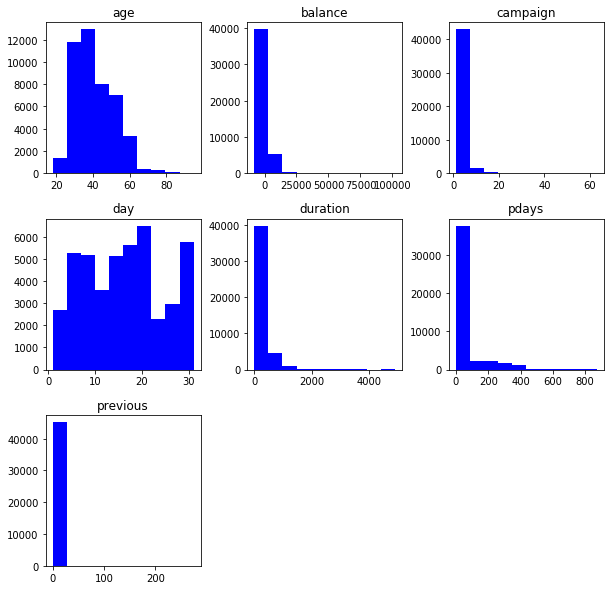

In [31]:
my_data.hist(figsize=(10,10),color="blue",grid=False)
plt.show()

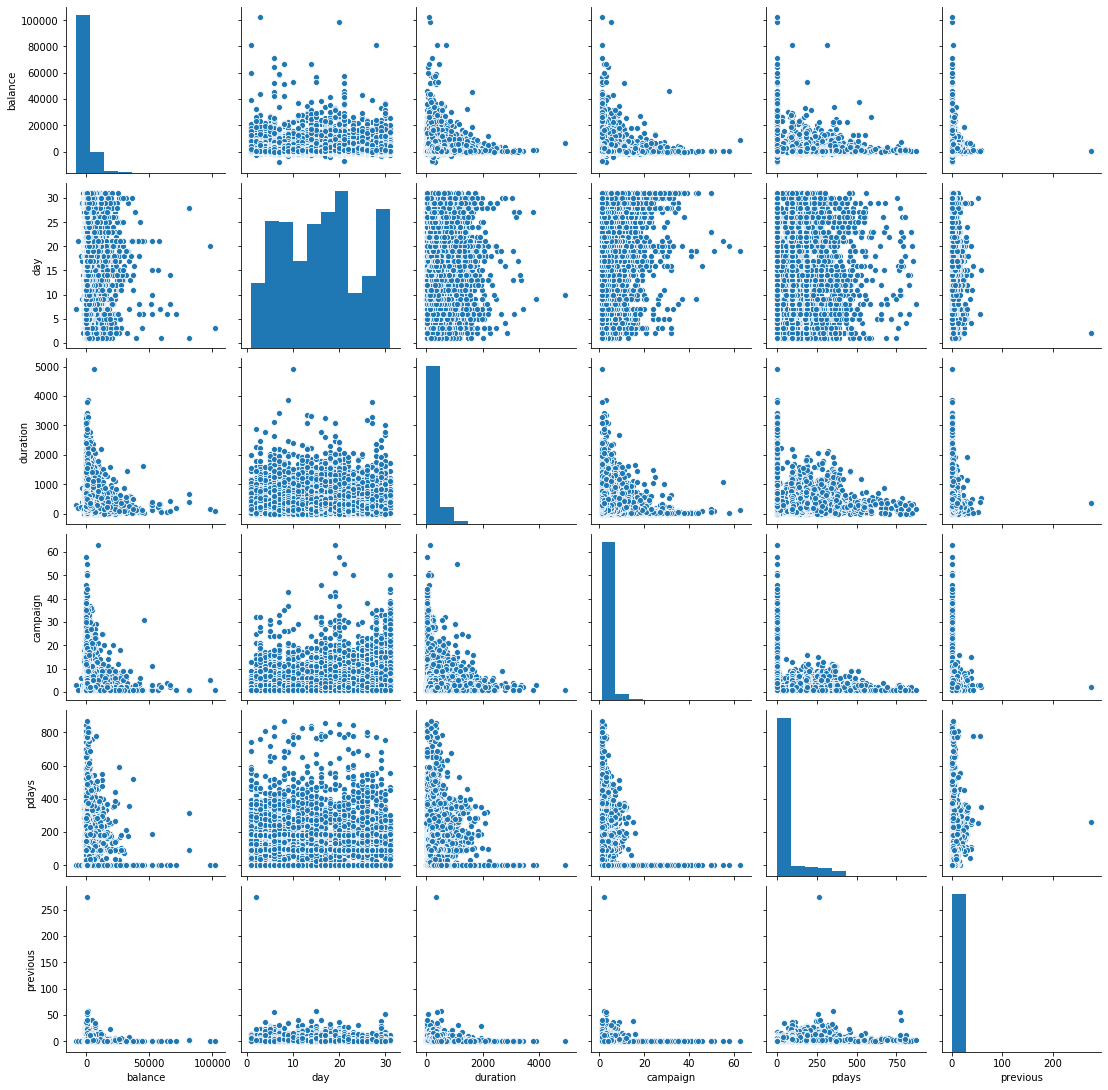

In [32]:
sns.pairplot(my_data.iloc[:,1:])

## Checking the presence of outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

## AGE

In [6]:
print('MIN AGE: ', my_data['age'].min())
print('MAX AGE: ',my_data['age'].max())

MIN AGE:  18
MAX AGE:  95


Text(0.5, 1.0, 'AGE DISTRIBUTION')

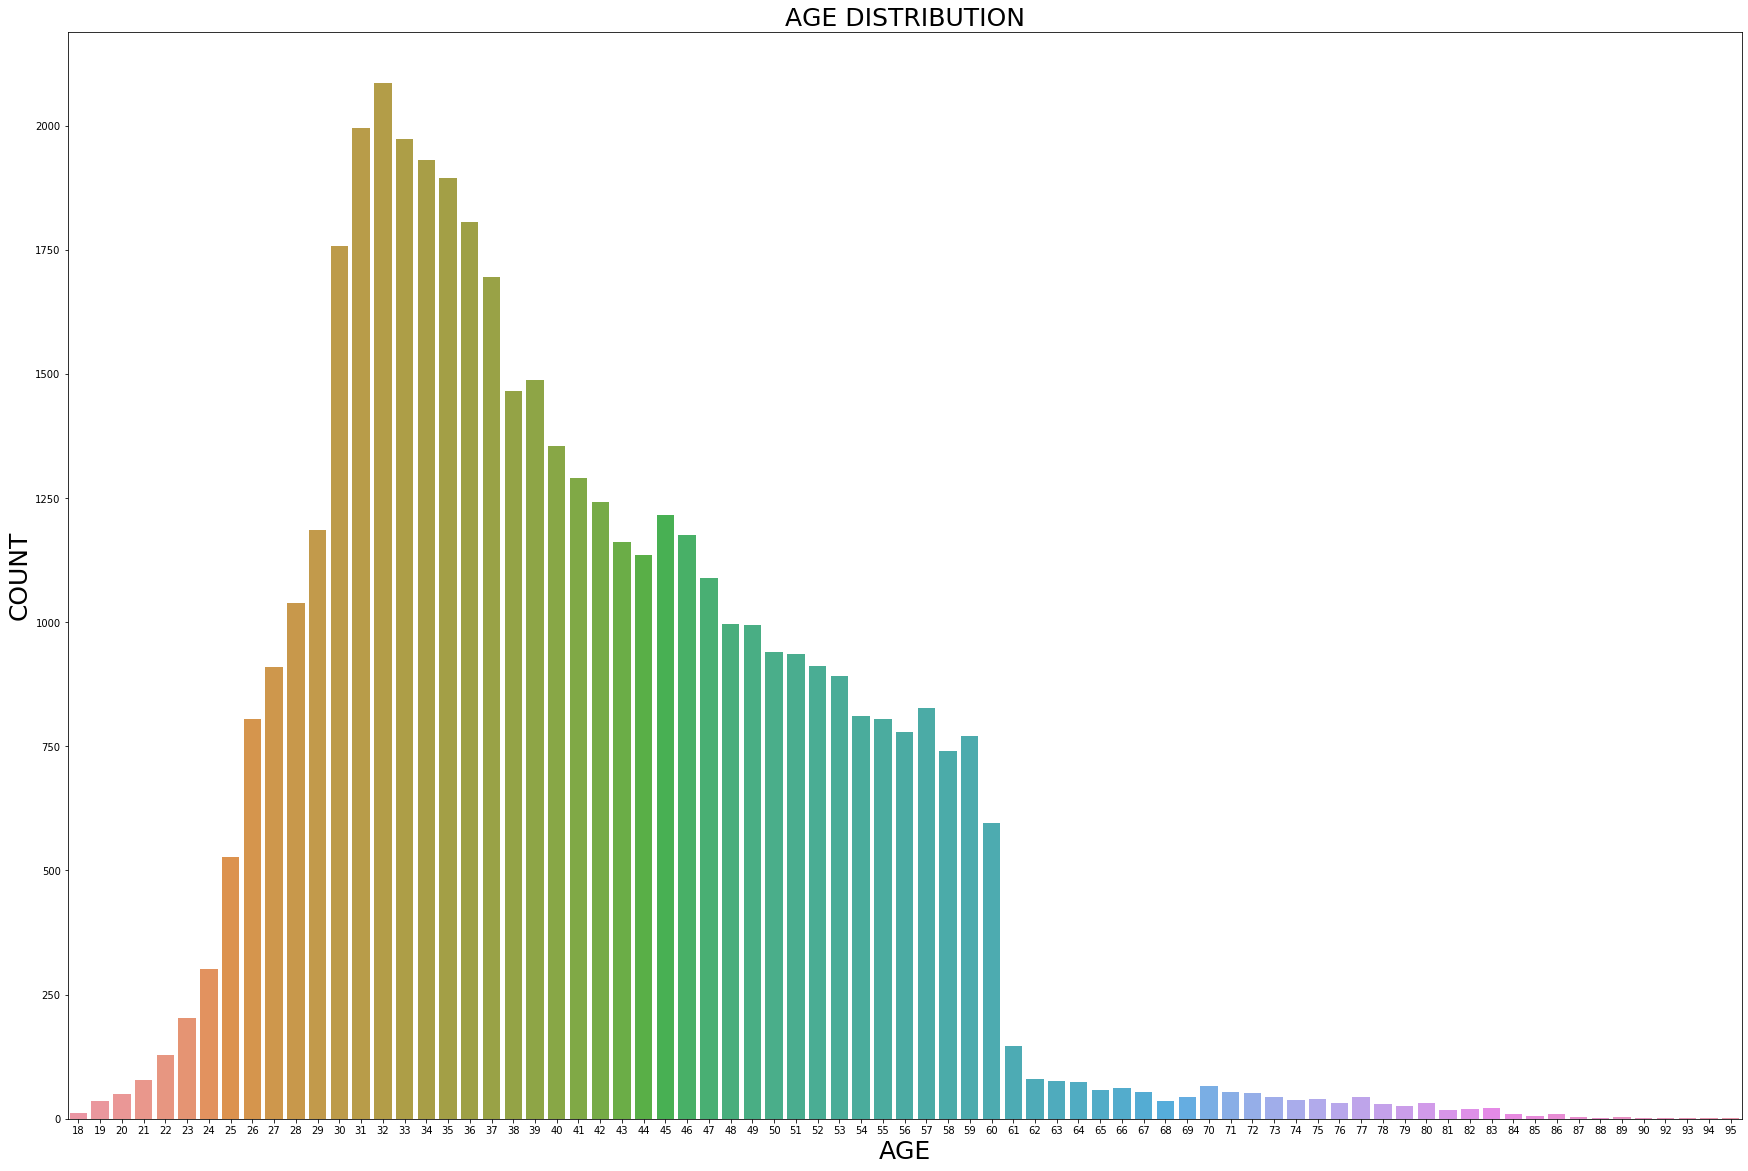

In [11]:
plt.figure(figsize=(30,20))
sns.countplot(x='age',data=my_data)
plt.xlabel("AGE",fontsize=25)
plt.ylabel("COUNT",fontsize=25)
plt.title("AGE DISTRIBUTION",fontsize=25)

Text(0.5, 1.0, 'AGE DISTRIBUTION')

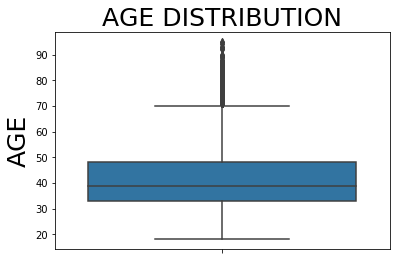

In [17]:
sns.boxplot(x='age',data=my_data,orient='v')
plt.ylabel("AGE",fontsize=25)
plt.title("AGE DISTRIBUTION",fontsize=25)

a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

Text(0.5, 1.0, 'AGE X OCCURENCE')

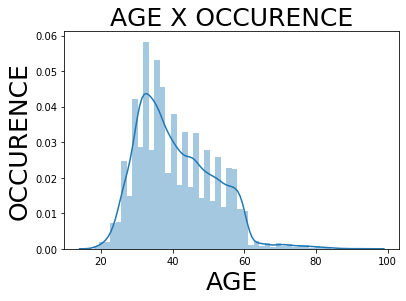

In [18]:
sns.distplot(my_data['age'])
plt.xlabel("AGE",fontsize=25)
plt.ylabel("OCCURENCE",fontsize=25)
plt.title("AGE X OCCURENCE",fontsize=25)

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it.

## JOB

Text(0.5, 1.0, 'JOB DISTRIBUTION')

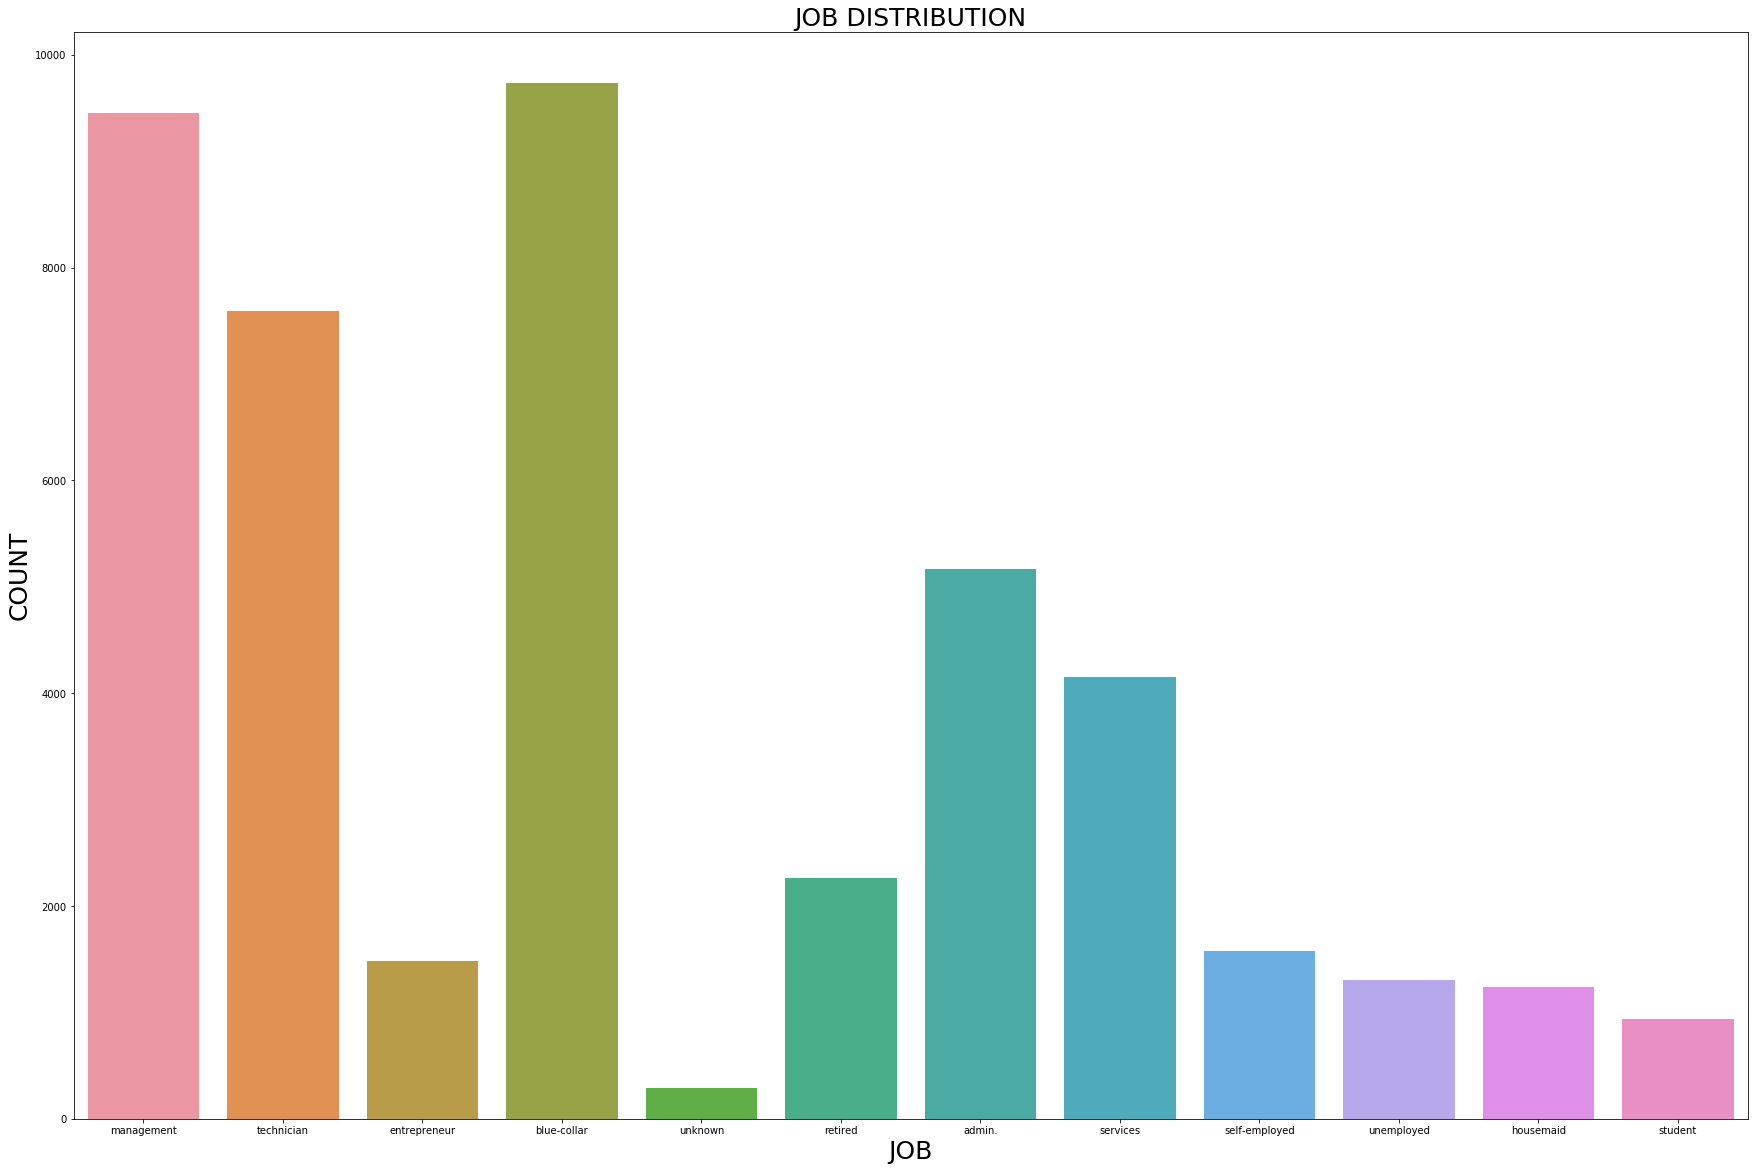

In [19]:
plt.figure(figsize=(30,20))
sns.countplot(x='job',data=my_data)
plt.xlabel("JOB",fontsize=25)
plt.ylabel("COUNT",fontsize=25)
plt.title("JOB DISTRIBUTION",fontsize=25)

The count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.


## MARITAL

Text(0.5, 1.0, 'MARITAL DISTRIBUTION')

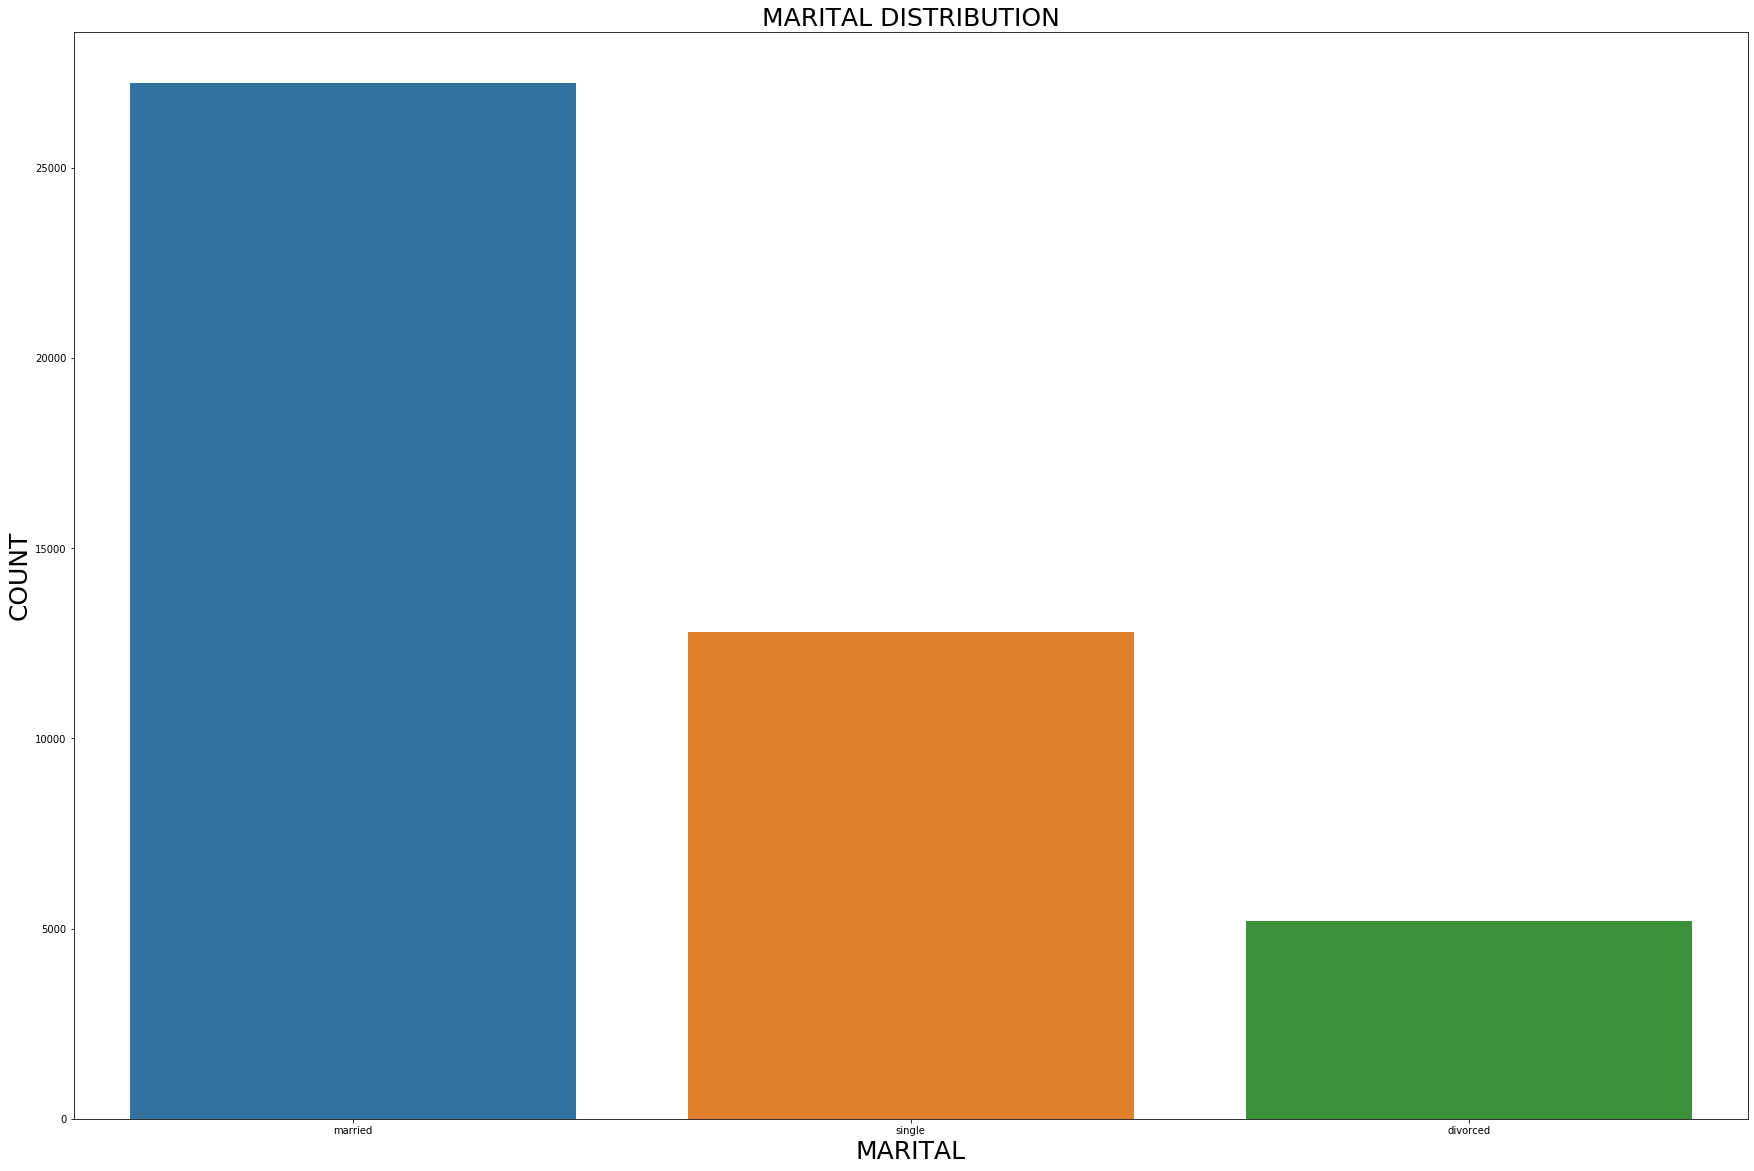

In [20]:
plt.figure(figsize=(30,20))
sns.countplot(x='marital',data=my_data)
plt.xlabel("MARITAL",fontsize=25)
plt.ylabel("COUNT",fontsize=25)
plt.title("MARITAL DISTRIBUTION",fontsize=25)

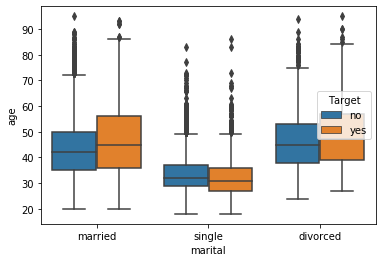

In [49]:

sns.boxplot(x='marital',y='age',hue='Target',data=my_data)

Here we can see the Married people are more subscribing a term deposit. But here is also 50 percente chances to suscribe by clients as we can see in graphs.

Married people are more ,we can see here clearly.

## EDUCATION

Text(0.5, 1.0, 'EDUCATION DISTRIBUTION')

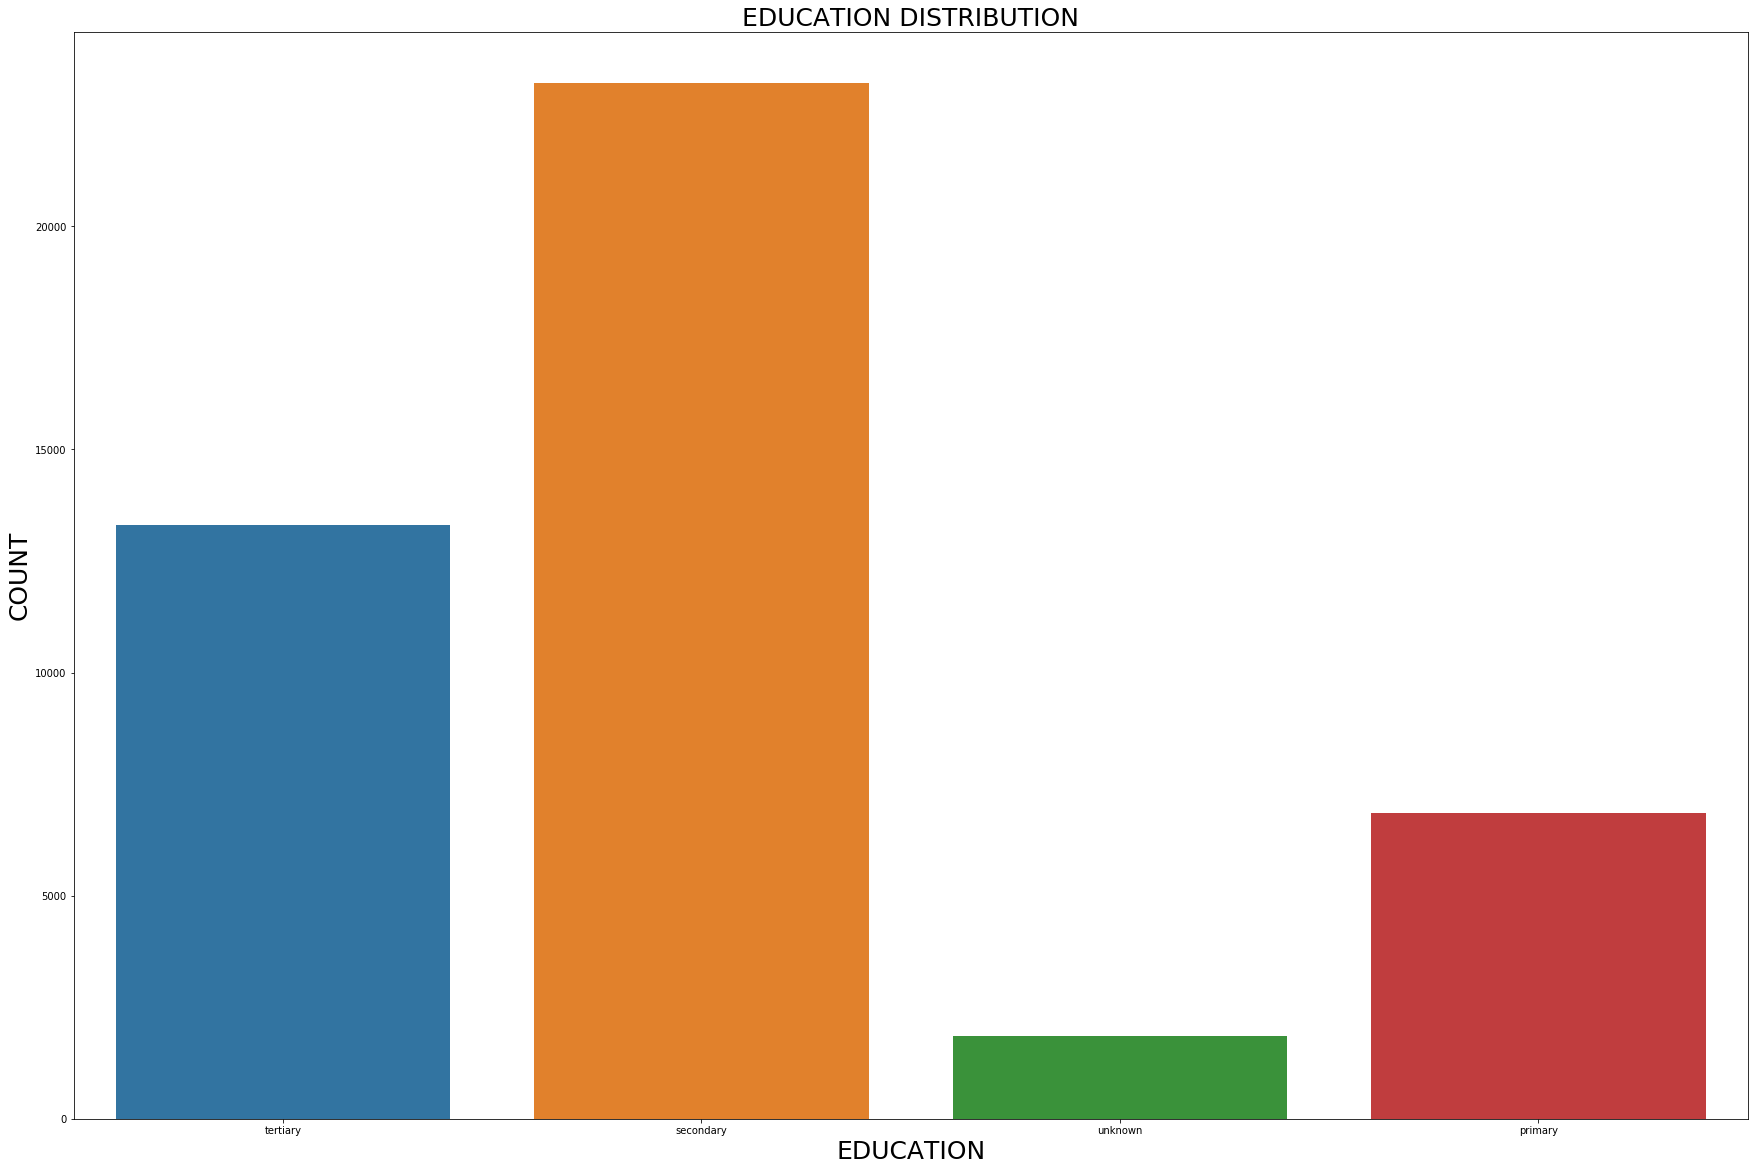

In [30]:
plt.figure(figsize=(30,20))
sns.countplot(x='education',data=my_data)
plt.xlabel("EDUCATION",fontsize=25)
plt.ylabel("COUNT",fontsize=25)
plt.title("EDUCATION DISTRIBUTION",fontsize=25)

The clients having secondary education are more .And the clients having unknown eduction are less

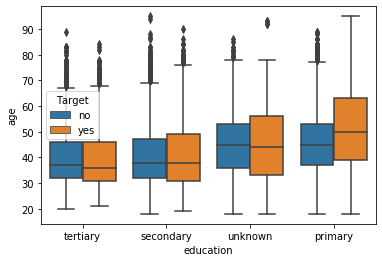

In [8]:
##plt.figure(figsize=(15,15))
sns.boxplot(x='education',y='age',hue='Target',data=my_data)

the clients having primary education are more who have subscribed a term deposit.

## Default  "credit in default"

Text(0.5, 1.0, 'Default Distribution')

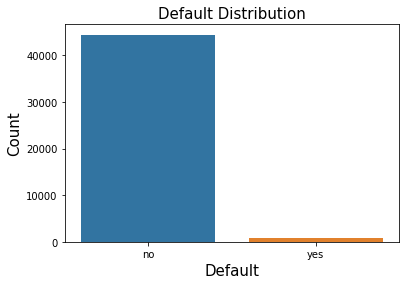

In [50]:
sns.countplot(x = 'default',data = my_data)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

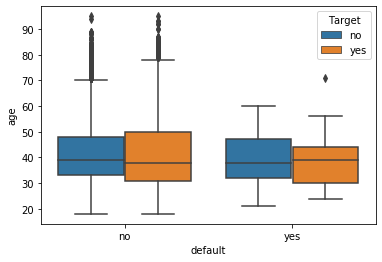

In [7]:
sns.boxplot(x='default',y='age',hue='Target',data=my_data)


In [12]:
print('Default: \n No credit in default:', my_data[my_data['default'] == 'no']['age'].count(),
      '\n Yes to credit in default:', my_data[my_data['default'] == 'yes'] ['age'].count())

Default: 
 No credit in default: 44396 
 Yes to credit in default: 815


The clients having bydefault credit are less than those who don't have bydefault credit.

## HOUSING

Text(0.5, 1.0, 'housing distribution')

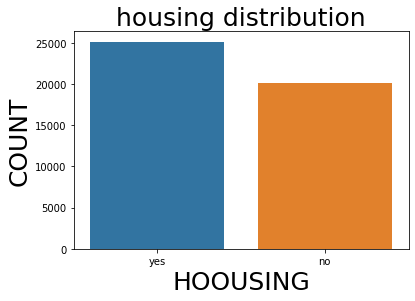

In [51]:
sns.countplot(x='housing' ,data=my_data)
plt.xlabel("HOOUSING",fontsize=25)
plt.ylabel("COUNT",fontsize=25)
plt.title("housing distribution",fontsize=25)

In [13]:
print("housing \n NO HOUSING:",my_data[my_data['housing']=='no']['age'].count(),
      "\n YES HOUSING",my_data[my_data['housing']=='yes']['age'].count())

housing 
 NO HOUSING: 20081 
 YES HOUSING 25130


The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan

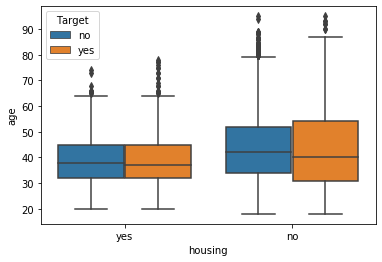

In [14]:
sns.boxplot(x='housing',y='age',hue='Target',data=my_data)


The clients who don't have taken housing loan have subscribed a term deposite with more than 50% chances

## LOAN

Text(0.5, 1.0, 'Loan Distribution')

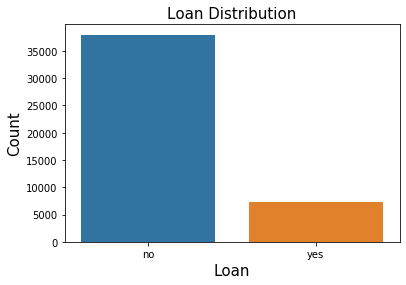

In [52]:
sns.countplot(x = 'loan',data = my_data)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

In [16]:
print('Loan:\n No Personal loan:', my_data[my_data['loan'] == 'no'] ['age'].count(),
 '\n Yes Personal Loan:', my_data[my_data['loan'] == 'yes']['age'].count())

Loan:
 No Personal loan: 37967 
 Yes Personal Loan: 7244


the clients having personal loan are less, than client having personal loan
(difference is 30000)

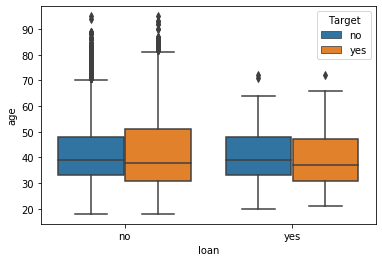

In [17]:
sns.boxplot(x='loan',y='age',hue='Target',data=my_data)


## CONTACT

Text(0.5, 1.0, 'Contact Distribution')

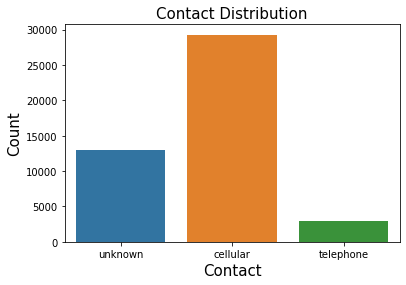

In [53]:
sns.countplot(x = 'contact',data = my_data)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

In [20]:
print('Contact:\n Unknown Contact:',my_data[my_data['contact'] == 'unknown'] ['age'].count(),
              '\n Cellular Contact:',my_data[my_data['contact'] == 'cellular']['age'].count(),
              '\n Telephone Contact:',my_data[my_data['contact'] == 'telephone']['age'].count())

Contact:
 Unknown Contact: 13020 
 Cellular Contact: 29285 
 Telephone Contact: 2906


The count of a clients who can be contacted by Cellular is high that the others.

## MONTH

Text(0.5, 1.0, 'Monthly Distribution')

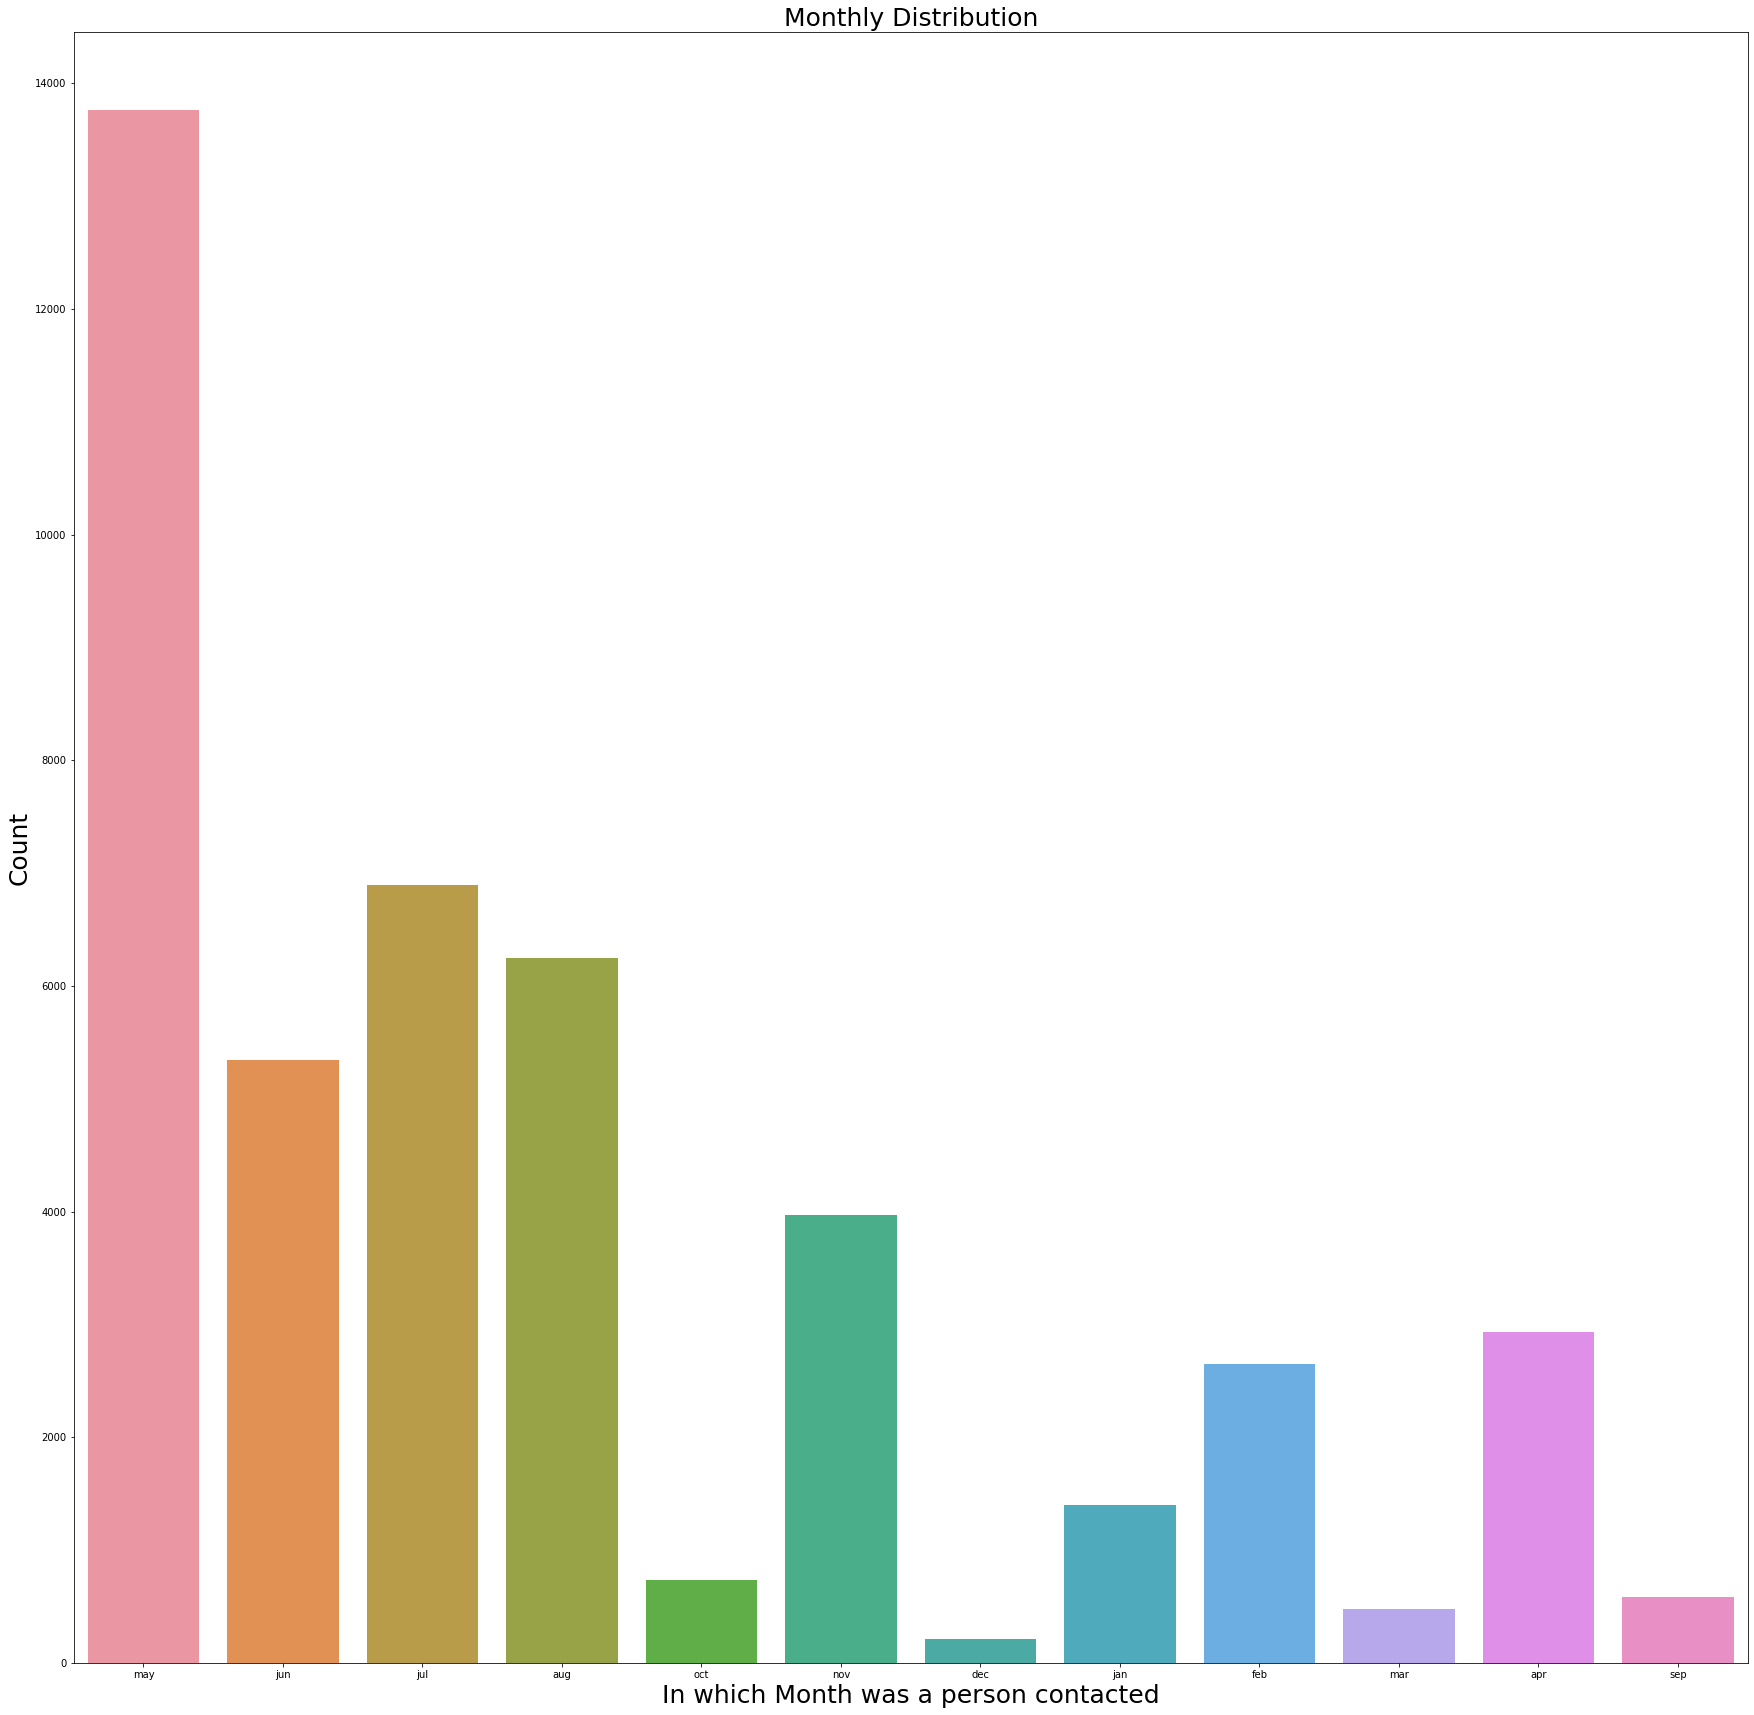

In [23]:
plt.figure(figsize = (30,30))
sns.countplot(x = 'month',data = my_data)
plt.xlabel("In which Month was a person contacted", fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.title('Monthly Distribution', fontsize=25)

The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.


## DAY

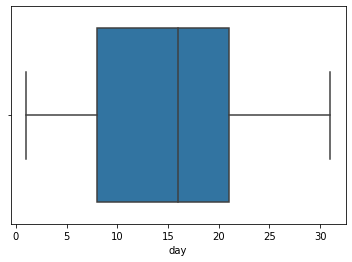

In [24]:
sns.boxplot(x=my_data["day"])


Most of the contacts are done in between 8th-21st day of the particular month.And Also there is no outlier present

## DURATION OF CALL

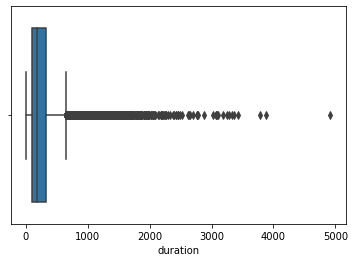

In [26]:
sns.boxplot(x=my_data["duration"])


Text(0.5, 1.0, 'Duration distribution')

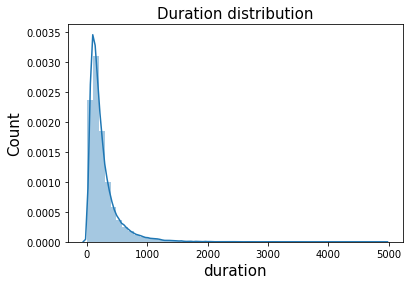

In [27]:
sns.distplot(my_data['duration'])
plt.xlabel("duration", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Duration distribution', fontsize=15)


## CAMPAIGN

Text(0.5, 1.0, 'Campaign Distribution')

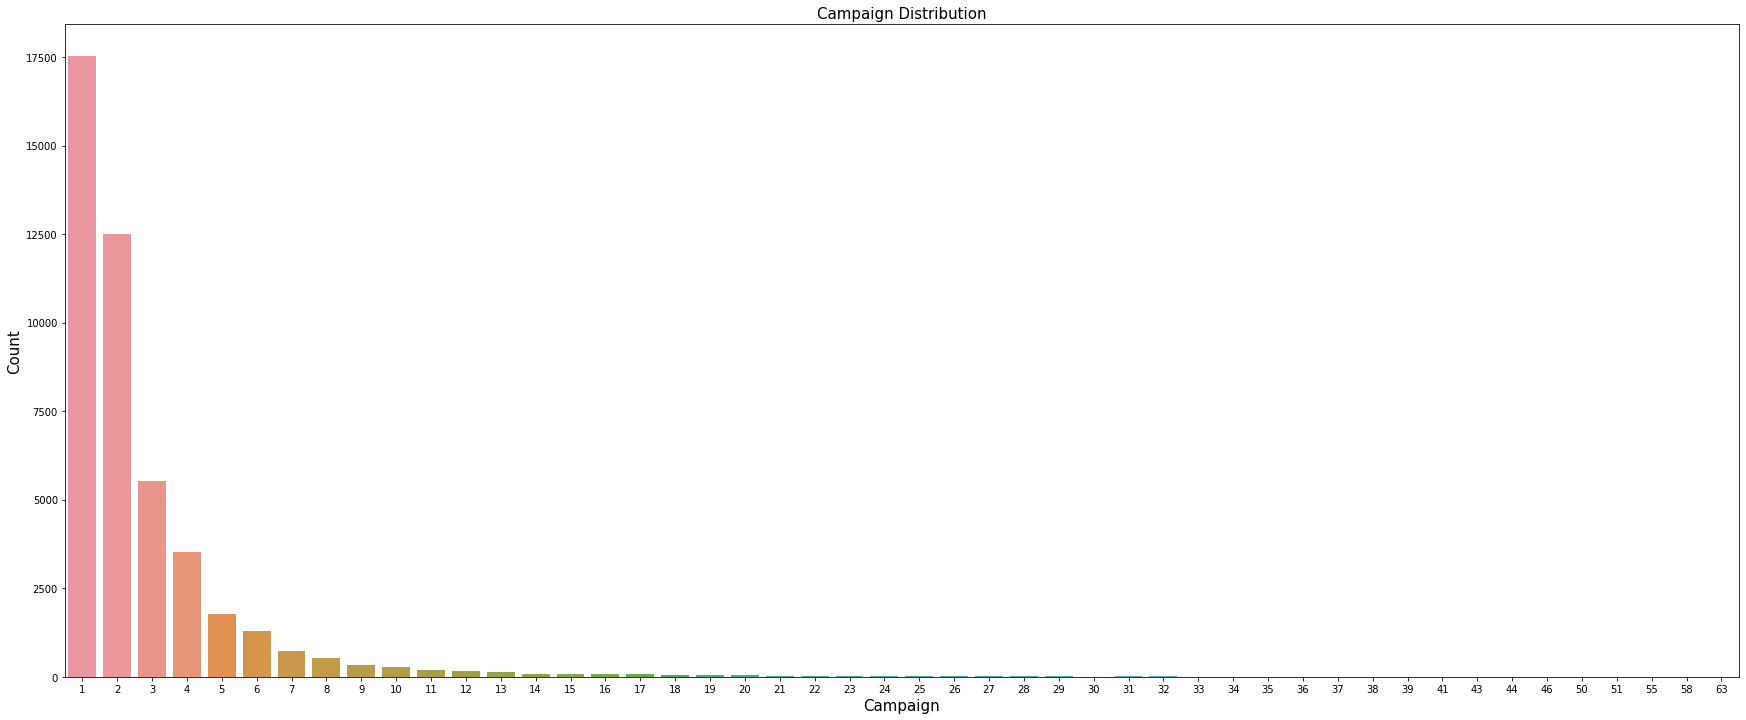

In [28]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'campaign', data = my_data)
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

Text(0.5, 1.0, 'Campaign Distribution')

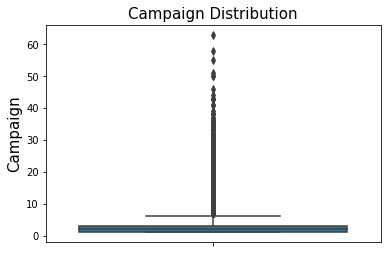

In [29]:
sns.boxplot(x = 'campaign', data = my_data, orient = 'v')
plt.ylabel("Campaign", fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

Text(0.5, 1.0, 'Campaign distribution')

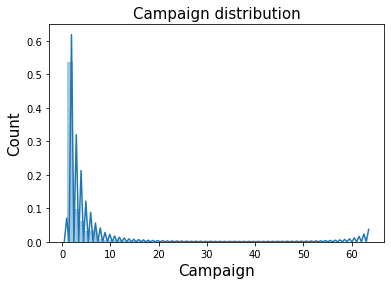

In [30]:
sns.distplot(my_data['campaign'])
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign distribution', fontsize=15)

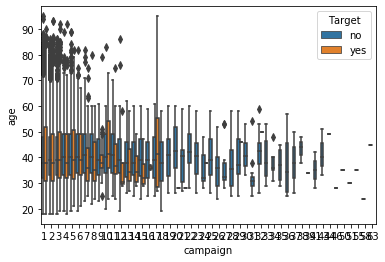

In [31]:
sns.boxplot(x='campaign',y='age',hue='Target',data=my_data)


## Pdays

Text(0.5, 1.0, 'pdays Distribution')

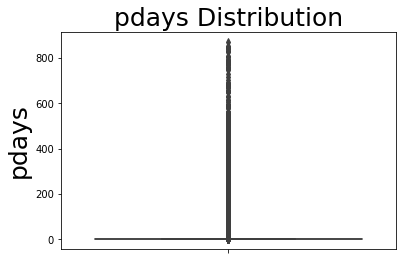

In [32]:
sns.boxplot(x = 'pdays', data = my_data, orient = 'v')
plt.ylabel("pdays", fontsize=25)
plt.title('pdays Distribution', fontsize=25)

## Previous

Text(0.5, 1.0, 'Previous')

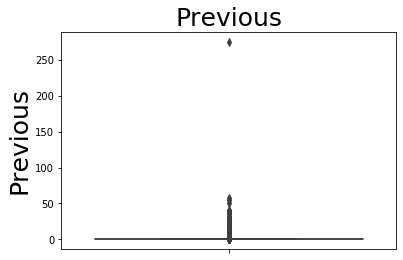

In [33]:
sns.boxplot(x = 'previous', data = my_data, orient = 'v')
plt.ylabel("Previous", fontsize=25)
plt.title('Previous', fontsize=25)

## poutcome

Text(0.5, 1.0, 'Poutcome distribution')

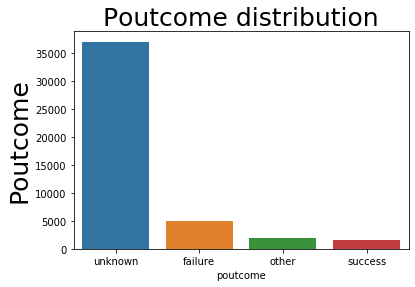

In [35]:
sns.countplot(x = 'poutcome', data = my_data, orient = 'v')
plt.ylabel("Poutcome", fontsize=25)
plt.title('Poutcome distribution', fontsize=25)


In [36]:
print('poutcome:\n Unknown poutcome:'     , my_data[my_data['poutcome'] == 'unknown']   ['age'].count(),
              '\n Failure in  poutcome:'  , my_data[my_data['poutcome'] == 'failure']   ['age'].count(),
              '\n Other poutcome:'        , my_data[my_data['poutcome'] == 'other']     ['age'].count(),
              '\n Success in poutcome:'   , my_data[my_data['poutcome'] == 'success']   ['age'].count())

poutcome:
 Unknown poutcome: 36959 
 Failure in  poutcome: 4901 
 Other poutcome: 1840 
 Success in poutcome: 1511


The success of the previous marketing campaign is not noticeable as we can see in graph.But still I am not sure as there are so many unknown options present.

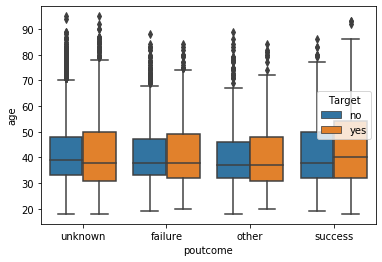

In [37]:
sns.boxplot(x='poutcome',y='age',hue='Target',data=my_data)


## TARGET COLUMN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290D44EEB88>,
      dtype=object)

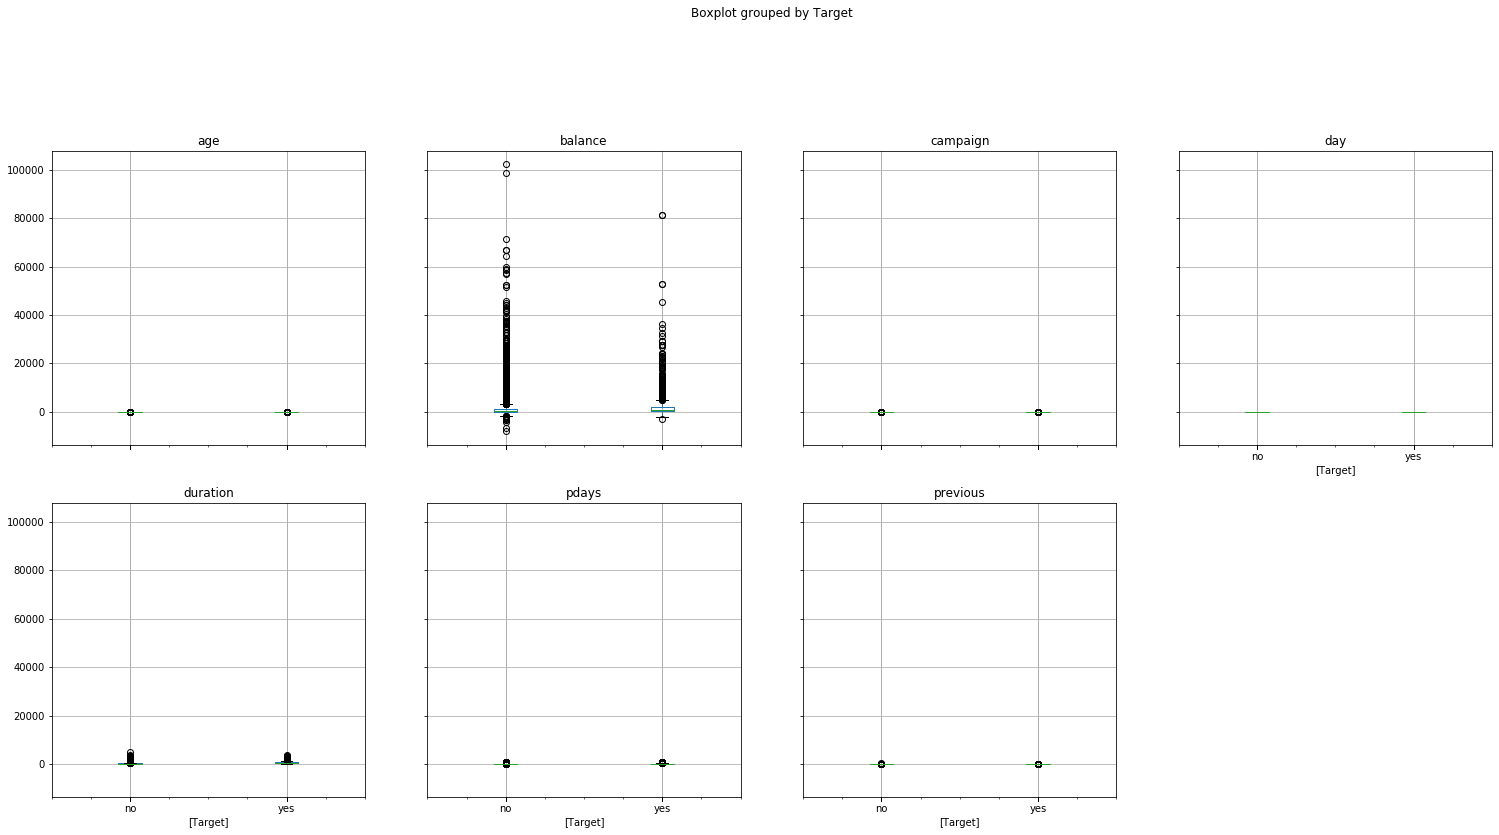

In [44]:
my_data.boxplot(by = 'Target',layout=(4,4), figsize=(25, 25))


Text(0.5, 1.0, 'Target distribution')

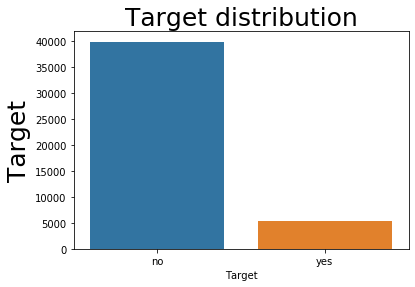

In [45]:
sns.countplot(x = 'Target', data = my_data, orient = 'v')
plt.ylabel("Target", fontsize=25)
plt.title('Target distribution', fontsize=25)

In [46]:
#Let us look at the target column which is "Target"(yes/no).
my_data.groupby(["Target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


## Calculate the correlation matrix


A correlation matrix is simply a table which displays the correlation. It is best used in variables that demonstrate a linear relationship between each other. coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table.

In [47]:
cor=my_data.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## HEATMAP

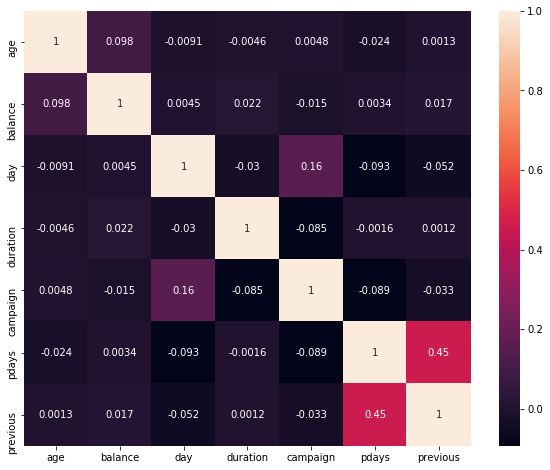

In [48]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

## Conclusion from EDA


1.The ages are not that much important and dont make sense relate with other variables will not tell any insight.Just looking at the graphs we cannot conclude if age have a high effect to our Target variable.

2.Here we can see the percentage of the outliers for 'Age' is less, so we can fit the model with and without them.

3.If we consider the Job attribute we can see the count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.

4.Married people are more ,we can see in graph clearly.

5.The clients having secondary education are more .And the clients having unknown eduction are less .

6.The clients having bydefault credit are less than those who don't have bydefault credit

7.The clients having Housing loan are more by almost 5000 count than the clients who don't have Housing Loan.

8.The clients having Personal loan are less than clients don't have Personal loan.Difference is almost 30000 count.

9.The count of a clients who can be contacted by Cellular is high that the others.

10.The no. of contacts performed in May month is highest than the other months.But it is not sure as the year is not mentioned in the dataset.

11.Most of the contacts are done in between 8th-21st day of the particular month.And Also there is no outlier present.

12.Just looking at the graphs we cannot conclude if duration have a high effect to our Target variable.Here we can see the percentage of the outliers is less.But count is high means 643 count is not less I think so.

13.The percentage of presence of outlier is less as we can see.So we can fit the model with or without this attribute.

14.The success of the previous marketing campaign is not noticeable as we can see in graph.But still I am not sure as thereare so many unknown options present.

15.I think for the Jobs, Marital and Education the best analisys is just the count of each variable, if we related with the other ones its is not conclusive.

16.The Mareied people are more subscribing a term deposit. But here is also 50 percente chances to suscribe by clients as we can see in graphs.

17.here are outliers present in each education criteria . But the clients having primary education are more who have subscribed a term deposit.

18.The clients who don't have taken housing loan have subscribed a term deposite with more than 50% chances.